In [1]:
import matplotlib.pyplot as plt
import pandas as pd


model_coverage = 15  # degrees
factor = 360/model_coverage

filename = "results/he/surface_flux_flibe_top.csv"
df = pd.read_csv(filename)

df

,t(s),T flux surface 8
0,1.000000e+02,0.000000
1,1.000000e+02,0.000000
2,2.100000e+02,64.305146
3,2.100000e+02,0.000000
4,2.100000e+02,0.000000
...,...,...
273,4.783292e+06,0.000000
274,4.783292e+06,0.000000
275,5.260662e+06,0.278758
276,5.260662e+06,0.000000


In [2]:
# add another file to the datafram
filename = "results/he/surface_flux_inconel_inner_side.csv"

df2 = pd.read_csv(filename)

# add a new column to df
df["T flux surface 9"] = df2["T flux surface 9"]
df

,t(s),T flux surface 8,T flux surface 9
0,1.000000e+02,0.000000,0.000000e+00
1,1.000000e+02,0.000000,5.878221e-02
2,2.100000e+02,64.305146,0.000000e+00
3,2.100000e+02,0.000000,-1.859393e-27
4,2.100000e+02,0.000000,9.637153e-02
...,...,...,...
273,4.783292e+06,0.000000,-8.925640e-03
274,4.783292e+06,0.000000,2.384078e-02
275,5.260662e+06,0.278758,0.000000e+00
276,5.260662e+06,0.000000,-8.014398e-03


In [3]:
# add another file to the datafram
filename = "results/he/surface_flux_inconel_outer_side_calculated.csv"

df3 = pd.read_csv(filename)
# add a new column to df
df["T calculated flux surface 13"] = df3["T calculated flux surface 13"]
df

,t(s),T flux surface 8,T flux surface 9,T calculated flux surface 13
0,1.000000e+02,0.000000,0.000000e+00,-4.856294e-17
1,1.000000e+02,0.000000,5.878221e-02,-1.971813e-16
2,2.100000e+02,64.305146,0.000000e+00,-9.075122e-66
3,2.100000e+02,0.000000,-1.859393e-27,-2.477543e-16
4,2.100000e+02,0.000000,9.637153e-02,-5.050799e-15
...,...,...,...,...
273,4.783292e+06,0.000000,-8.925640e-03,-2.567492e-11
274,4.783292e+06,0.000000,2.384078e-02,-1.544283e-11
275,5.260662e+06,0.278758,0.000000e+00,-7.988850e-11
276,5.260662e+06,0.000000,-8.014398e-03,-7.834230e-12


In [4]:
# sum the duplicate times
df = df.groupby("t(s)").sum().reset_index()
df

,t(s),T flux surface 8,T flux surface 9,T calculated flux surface 13
0,1.000000e+02,0.000000,0.058782,-2.457443e-16
1,2.100000e+02,64.305146,0.096372,-5.298554e-15
2,3.310000e+02,92.109888,0.137675,-1.051888e-13
3,4.641000e+02,118.789163,0.182853,-9.907556e-13
4,6.105100e+02,144.880371,0.232367,-5.535407e-12
...,...,...,...,...
88,3.596144e+06,2.068159,0.040069,-8.129819e-10
89,3.954799e+06,1.299594,0.028216,-4.056086e-10
90,4.349320e+06,0.794337,0.020246,-2.253668e-10
91,4.783292e+06,0.474215,0.014915,-1.422793e-10


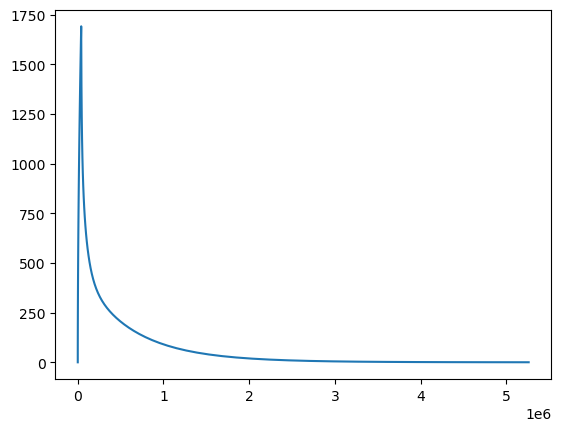

In [5]:
plt.plot(df["t(s)"], df["T flux surface 8"])

In [6]:
import requests

# read experimental data
url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-1/refs/tags/v0.5/data/processed_data.json"
experimental_data = requests.get(url).json()
cumulative_release_exp_inner = experimental_data["cumulative_tritium_release"]["IV"][
    "total"
]["value"]
sampling_times_inner = experimental_data["cumulative_tritium_release"]["IV"][
    "sampling_times"
]["value"]
cumulative_release_exp_outer = experimental_data["cumulative_tritium_release"]["OV"][
    "total"
]["value"]
sampling_times_outer = experimental_data["cumulative_tritium_release"]["OV"][
    "sampling_times"
]["value"]


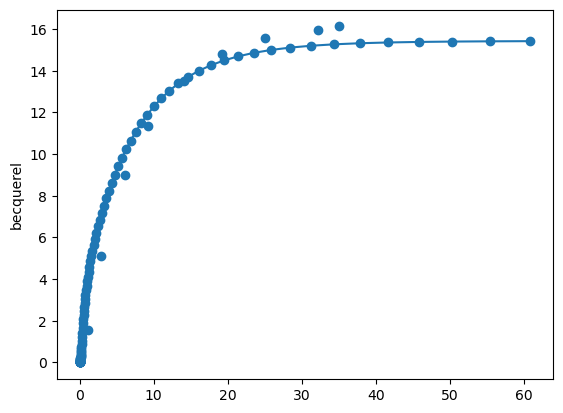

In [7]:
from scipy.integrate import cumulative_trapezoid
from libra_toolbox.tritium.model import quantity_to_activity, ureg

cumul_release = cumulative_trapezoid(df["T flux surface 8"], df["t(s)"], initial=0) * ureg.particle
cumul_release = quantity_to_activity(cumul_release).to(ureg.Bq)
cumul_release *= factor

s_to_days = 1 / 24 / 3600
plt.plot(df["t(s)"] * s_to_days, cumul_release, marker="o", label="FLIBE model")

plt.scatter(sampling_times_inner, cumulative_release_exp_inner * ureg.Bq)

In [8]:
experimental_data

{'modelled_TBR': {'mean': 0.0020419073550656465,
  'std_dev': 2.790358334510746e-05},
 'modelled_baby_radius': {'value': 7.0, 'unit': 'centimeter'},
 'modelled_baby_height': {'value': 0.00649612012619981,
  'unit': 'liter / centimeter ** 2'},
 'irradiations': [{'start_time': {'value': 0.0, 'unit': 'second'},
   'stop_time': {'value': 35580.0, 'unit': 'second'}},
  {'start_time': {'value': 36000.0, 'unit': 'second'},
   'stop_time': {'value': 43620.0, 'unit': 'second'}}],
 'neutron_rate_used_in_model': {'value': 91460000.0,
  'unit': 'neutron / second'},
 'measured_TBR': {'value': 0.002390925559738634, 'unit': 'particle / neutron'},
 'TBR_used_in_model': {'value': 0.002390925559738634,
  'unit': 'particle / neutron'},
 'k_top': {'value': 8.9e-08, 'unit': 'meter / second'},
 'k_wall': {'value': 1.5130000000000003e-09, 'unit': 'meter / second'},
 'cumulative_tritium_release': {'IV': {'total': {'value': [1.5679999999999996,
     5.085,
     8.999,
     11.341000000000001,
     13.501000000

In [9]:
TBR = experimental_data["measured_TBR"]["value"] * ureg.particle/ureg.neutron
salt_vol = 1 * ureg.L
neutron_rate = experimental_data["neutron_rate_used_in_model"]["value"] * ureg.neutron/ureg.s

tritium_source = (TBR/salt_vol*neutron_rate).to(ureg.particle/ureg.m**3/ureg.s)
print(f"{tritium_source:.2e~P}")

2.19×10⁸ particle/m³/s


In [10]:
from festim_model import irradiation_time, my_source


expected_plateau = irradiation_time * ureg.s * tritium_source * salt_vol.to(ureg.m**3)
expected_plateau = quantity_to_activity(expected_plateau).to(ureg.Bq)
expected_plateau

<Quantity(16.89, 'becquerel')>

In [11]:
# add another file to the datafram
filename = "results/he/total_volume_flibe.csv"

df_inv = pd.read_csv(filename)
df_inv

,t(s),Total T volume 6
0,1.000000e+02,5457.632450
1,2.100000e+02,4494.970384
2,2.100000e+02,0.000000
3,2.100000e+02,11994.498165
4,3.310000e+02,7303.050432
...,...,...
272,4.783292e+06,0.000000
273,4.783292e+06,5733.276240
274,5.260662e+06,472.538686
275,5.260662e+06,0.000000


In [12]:

filename = "results/he/total_volume_inconel.csv"
df_inv2 = pd.read_csv(filename)
df_inv2
# # add a new column to df
df_inv["Total T volume 7"] = df_inv2["Total T volume 7"]

In [13]:
df_inv = df_inv.groupby("t(s)").sum().reset_index()
df_inv

,t(s),Total T volume 6,Total T volume 7
0,1.000000e+02,5457.632450,9.464627e-27
1,2.100000e+02,16489.468549,4.258808e+04
2,3.310000e+02,26773.333550,7.849360e+04
3,4.641000e+02,38334.151210,1.252072e+05
4,6.105100e+02,51227.788173,1.840498e+05
...,...,...,...
88,3.596144e+06,30877.110238,8.091188e+05
89,3.954799e+06,19118.479255,6.430144e+05
90,4.349320e+06,11417.277789,5.201099e+05
91,4.783292e+06,6568.014352,4.279845e+05


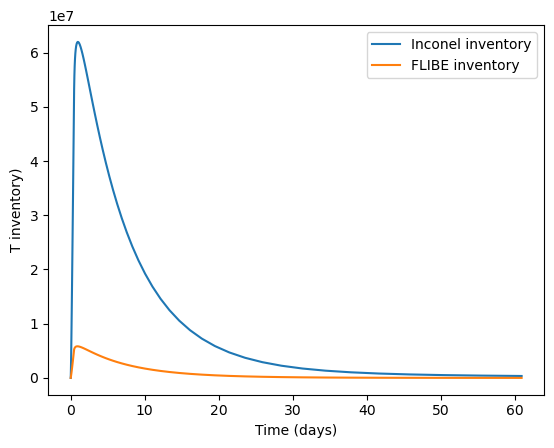

In [14]:
plt.plot(df_inv["t(s)"] * s_to_days, df_inv["Total T volume 7"] , label="Inconel inventory")
plt.plot(df_inv["t(s)"] * s_to_days, df_inv["Total T volume 6"], label="FLIBE inventory")
plt.xlabel("Time (days)")
plt.ylabel("T inventory)")
plt.legend()

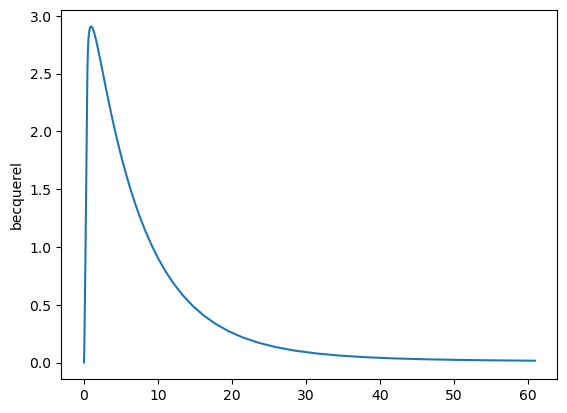

In [15]:
plt.plot(
    df_inv["t(s)"] * s_to_days,
    quantity_to_activity(
        df_inv["Total T volume 6"].to_numpy() * ureg.particle
        + df_inv["Total T volume 7"].to_numpy() * ureg.particle
    ).to(ureg.Bq)
    * factor,
    label="Total",
)